In [2]:
# импорт пакетов
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# чтение данных
df = pd.read_csv('annual-enterprise-survey-2021-financial-year-provisional-csv.csv',sep=',', encoding = 'UTF-8')


In [25]:
# shape and data types of the data
print(df.shape)
print(df.dtypes)


(41715, 10)
Year                            int64
Industry_aggregation_NZSIOC    object
Industry_code_NZSIOC           object
Industry_name_NZSIOC           object
Units                          object
Variable_code                  object
Variable_name                  object
Variable_category              object
Value                          object
Industry_code_ANZSIC06         object
dtype: object


In [26]:
# отбор числовых колонок
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['Year']


In [27]:
# отбор нечисловых колонок
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['Industry_aggregation_NZSIOC' 'Industry_code_NZSIOC'
 'Industry_name_NZSIOC' 'Units' 'Variable_code' 'Variable_name'
 'Variable_category' 'Value' 'Industry_code_ANZSIC06']


In [48]:
# Столбец Value должен содержать числовые значения. 
# Просмотрев данные, приходим к выводу, что необходимо убрать разделительную запятую

df['Value']=df['Value'].str.replace(',','')

# Строки содержат буквеннные значения вместо числовых
# Удалим их
ind=df.index [(df['Value'] == 'C')|(df['Value'] == 'S')]. tolist ()
df=df.drop(axis=0, index=ind)

df['Value']=pd.to_numeric(df['Value'])

<AxesSubplot:>

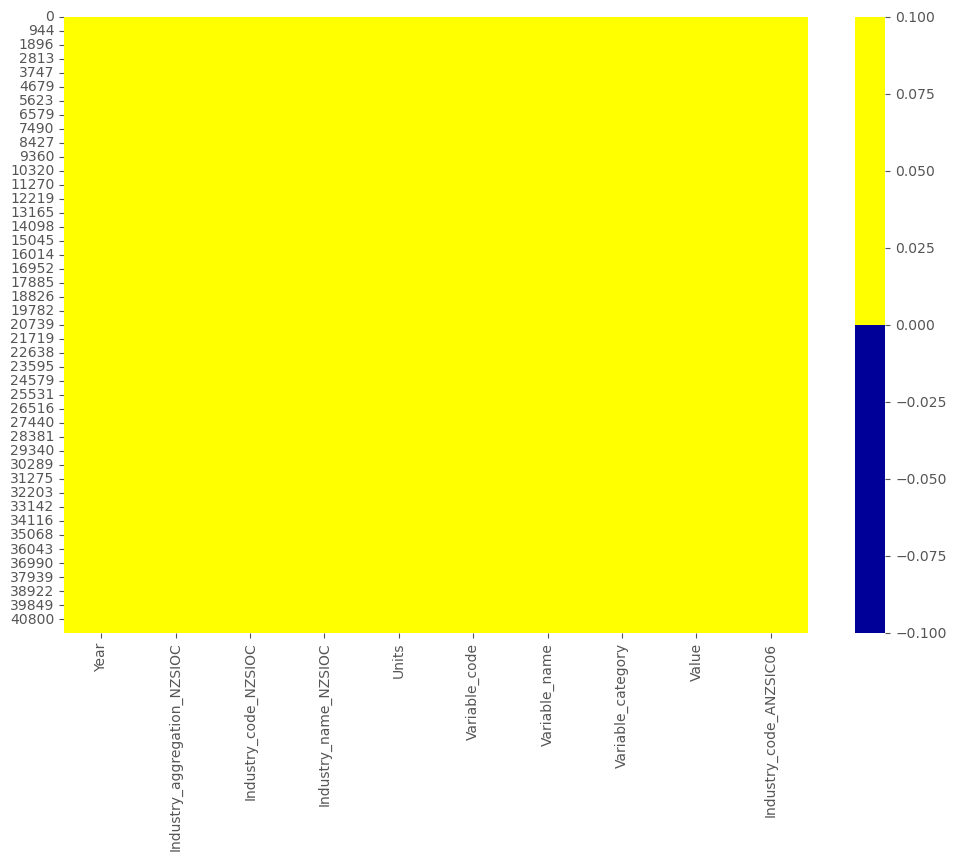

In [49]:
cols = df.columns
# определяем цвета 
# желтый - не пропущенные данные, синий - пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

В датасете нет пропущенных значений. Убедимся в этом, выведя процентное значение пустых данных.

In [50]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Year - 0%
Industry_aggregation_NZSIOC - 0%
Industry_code_NZSIOC - 0%
Industry_name_NZSIOC - 0%
Units - 0%
Variable_code - 0%
Variable_name - 0%
Variable_category - 0%
Value - 0%
Industry_code_ANZSIC06 - 0%


<AxesSubplot:>

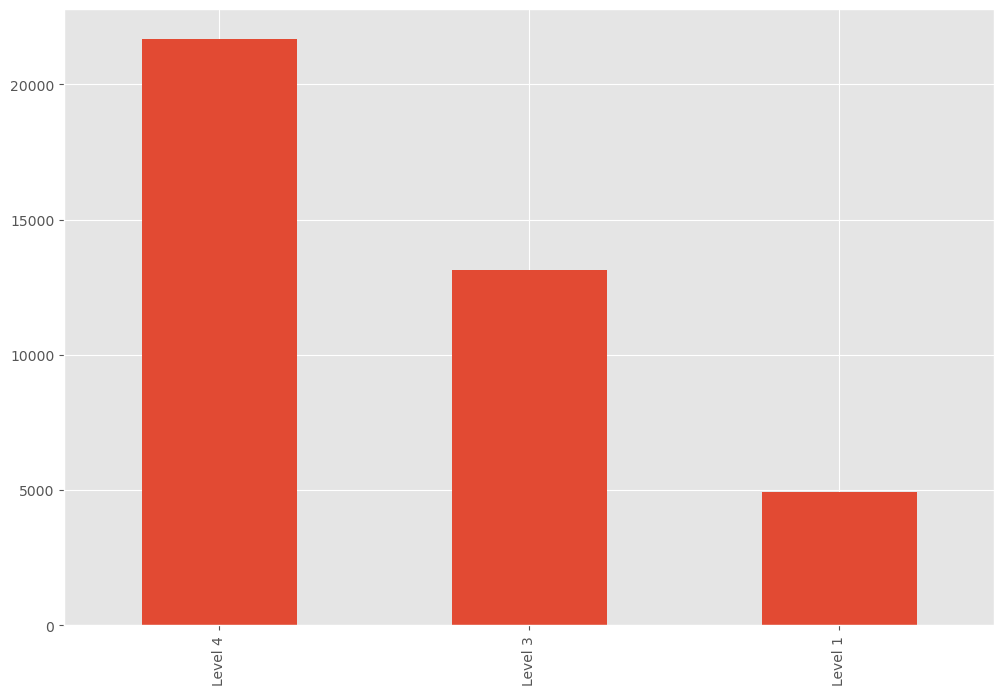

In [51]:
df['Industry_aggregation_NZSIOC'].value_counts().plot.bar()

<AxesSubplot:>

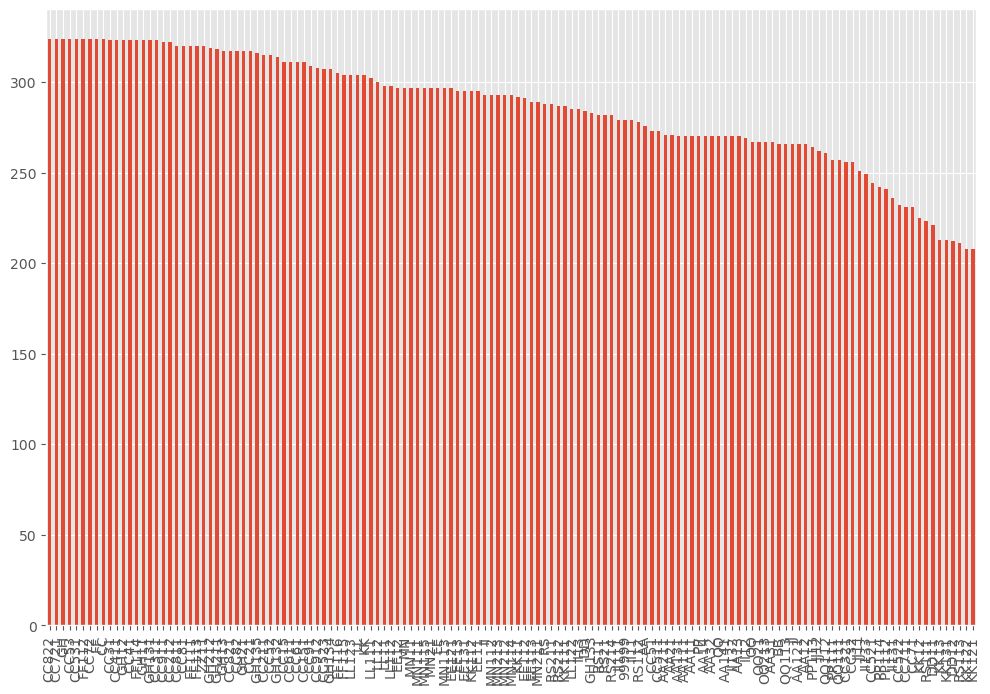

In [52]:
df['Industry_code_NZSIOC'].value_counts().plot.bar()

<AxesSubplot:>

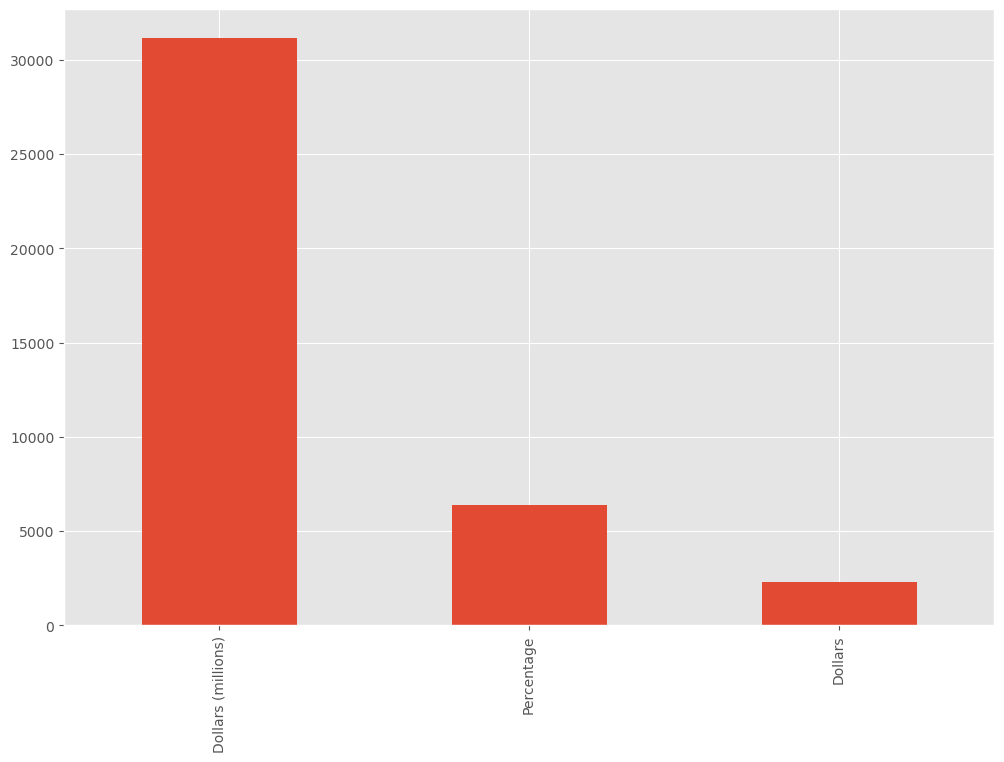

In [53]:
df['Units'].value_counts().plot.bar()

<AxesSubplot:>

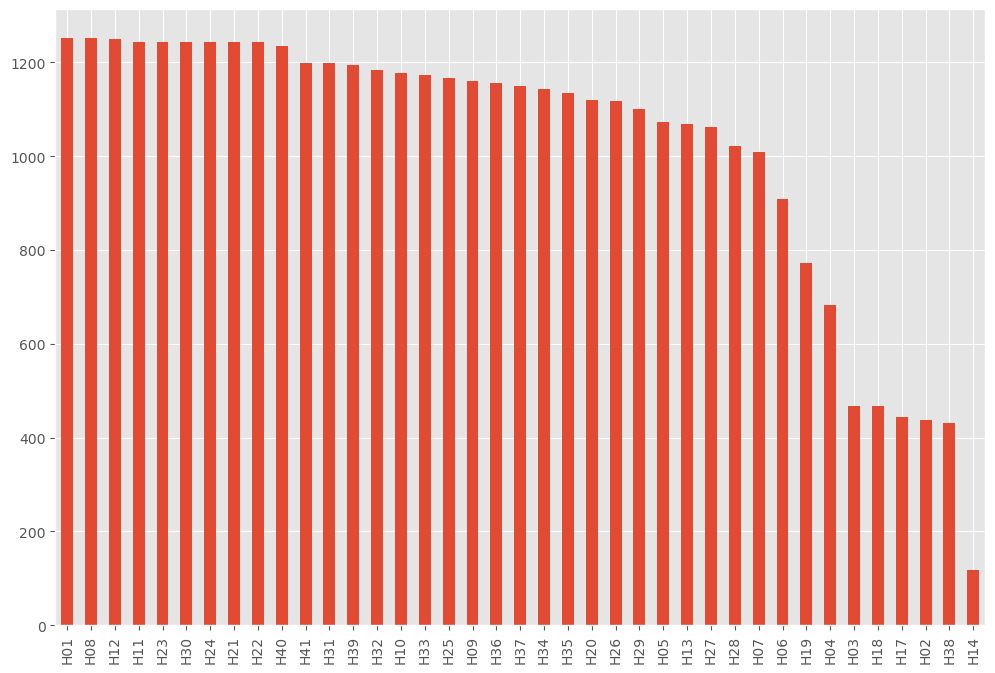

In [54]:
df['Variable_code'].value_counts().plot.bar()

<AxesSubplot:>

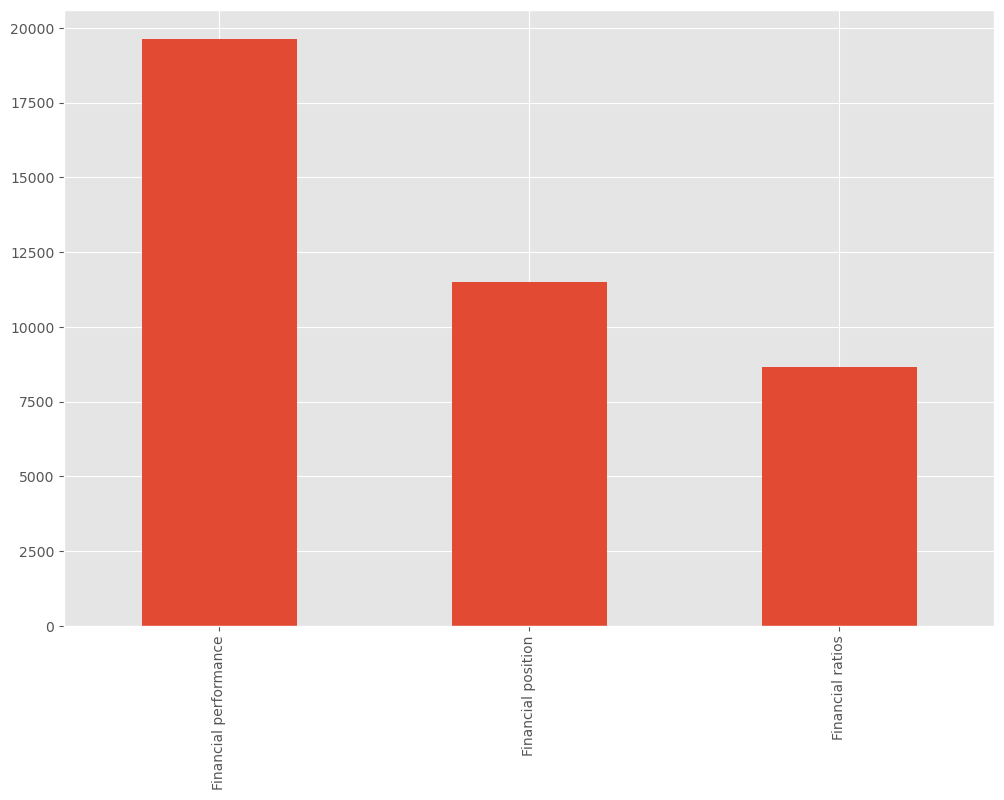

In [55]:
df['Variable_category'].value_counts().plot.bar()

Выбросов в данных не наблюдается